### House Prices

Competição do Kaggle sobre a previsão de preço das casas na cidade de Ames, Iowa (Estados Unidos)

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando o dataset de treino
base = pd.read_csv('train.csv')

In [3]:
# Visualizando essa base
base.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Retornando o shape da base
base.shape

(1460, 81)

In [5]:
# E as informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Começando a explorar os dados

In [9]:
# Visualizando quantidade de valores vazios
base.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [12]:
# Em porcentagem
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [15]:
# Podemos eliminar as colunas com mais de 10% de valores vazios
eliminar = base.columns[(base.isnull().sum() / base.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [16]:
# Eliminando essas colunas
base = base.drop(eliminar, axis=1)

In [17]:
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
PavedDrive      0.000000
WoodDeckSF      0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
dtype: float64

* Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    
    * Vamos **eliminar as colunas do texto**
    * Precisamos **tratar os valores vazios**
    * Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [22]:
# Selecionando apenas as colunas numéricas
colunas_num = base.columns[base.dtypes != 'object']
colunas_num

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
# E criar uma nova base com esses valores
base2 = base.loc[:, colunas_num]
base2

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [25]:
# Verificando valores vazios
base2.isnull().sum().sort_values(ascending=False)

GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
BedroomAbvGr      0
FullBath          0
MSSubClass        0
BsmtFinSF2        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
BsmtHalfBath      0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
SalePrice         0
dtype: int64

In [26]:
# Substituindo os valores vazios por -1
base2 = base2.fillna(-1)

* Essa será nossa base inicial para começar

### Criando nosso modelo

* **Vamos separar em treino e teste**

In [27]:
# Selecionando X e y
X = base2.drop('SalePrice', axis=1)
y = base2.SalePrice

In [28]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [29]:
# Separando a base em treino e teste(nesse caso seria uma validação, pois já temos um dataset de teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

* **O próximo passo é selecionar os algoritmos a serem utilizados. Podemos começar com alguns mais simples como:**

    * Regressão Linear
    
    * Árvore de Regressão
    
    * KNeighborsRegressor

In [30]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [33]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [34]:
# Fazendo a previsão pros dados de teste
y_rl = reg_rl.predict(X_test)

In [35]:
# Importando a árvore de regressão
from sklearn import tree

In [55]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [56]:
# Fazendo a previsão
y_ar = reg_ar.predict(X_test)

In [41]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [42]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [43]:
# Fazendo a previsão
y_knn = reg_knn.predict(X_test)

* **Agora vamos avaliar esses dados utilizando tanto o erro absoluto quanto o quadrático**

In [50]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [51]:
# Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [52]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

23763.18739306386
1533982883.4448688


In [57]:
# Avaliando o erro da árvore de decisão
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27580.78838174274
2530245114.701245


In [54]:
# Avaliando o erro do KNN
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

33273.08298755187
2733937586.841286


### Visualizando graficamente

In [65]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

[Text(0.5, 1.0, 'KNN')]

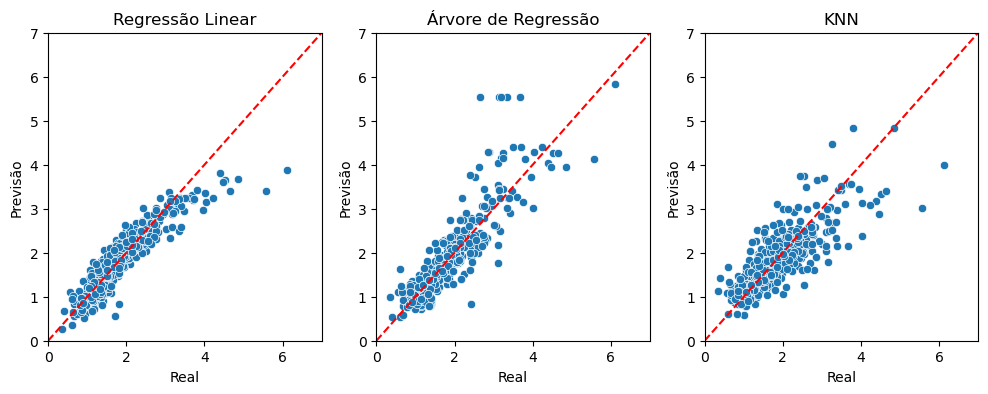

In [82]:
# Criando esse gráfico

fig = plt.figure(figsize=(12, 4))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[:, 0])
ax2 = fig.add_subplot(specs[:, 1])
ax3 = fig.add_subplot(specs[:, 2])

# Primeiro gráfico
ax1 = sns.scatterplot(x=y_test/100000, y=y_rl/100000, ax=ax1)
ax1.plot([0, 700000], [0, 700000], '--r')
ax1.set(xlim=(0, 7), ylim=(0, 7))
ax1.set_xlabel('Real')
ax1.set_ylabel('Previsão')
ax1.set(title='Regressão Linear') 

# Segundo gráfico
ax2 = sns.scatterplot(x=y_test/100000, y=y_ar/100000, ax=ax2) 
ax2.plot([0, 700000], [0, 700000], '--r')
ax2.set(xlim=(0, 7), ylim=(0, 7))
ax2.set_xlabel('Real')
ax2.set_ylabel('Previsão')
ax2.set(title='Árvore de Regressão')

# Terceiro gráfico
ax3 = sns.scatterplot(x=y_test/100000, y=y_knn/100000, ax=ax3) 
ax3.plot([0, 700000], [0, 700000], '--r')
ax3.set(xlim=(0, 7), ylim=(0, 7))
ax3.set_xlabel('Real')
ax3.set_ylabel('Previsão')
ax3.set(title='KNN')

* **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

### Fazendo a previsão para a base de teste da competição

In [87]:
# Importando a base de teste
teste = pd.read_csv('test.csv')

In [88]:
# Visualizando a base
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


* **Agora vamos repetir os mesmos tratamentos que fizemos na base de treino**
    * Obs: **não podemos excluir linhas**

In [89]:
# Eliminando as mesma colunas da base de treino
teste = teste.drop(eliminar, axis=1)

In [93]:
# Verificando as colunas numéricas
colunas_num2 = teste.columns[teste.dtypes != 'object']
colunas_num2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [94]:
# Mantendo também apenas as colunas numéricas
teste = teste.loc[:, colunas_num2]

In [96]:
# Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [99]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

* **Vamos precisar retirar os valores vazios, pois a regressão linear não vai conseguir trabalhar com valores assim.**
    * Se tentarmos usar essa base, ele vai retornar um **erro** dizendo que o **input possui valores NaN**
* Podemos substituir por -1 como fizemos acima


In [100]:
# Substituindo os valores vazios por -1
teste = teste.fillna(-1)

* Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle

In [102]:
# Regressão Linear
y_pred = reg_rl.predict(teste)

In [103]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [104]:
# Extrair somente o Id e o SalePrice
resultado = teste[['Id', 'SalePrice']]

In [105]:
# Podemos então exportar essa base
resultado.to_csv('resultado.csv', index=False)

### Resultados

O primeiro resultado que obtivemos no Kaggle foi 0.25, a meta agora é 0.15